# Dynamic Salary Retirement Model

Table of content:
- [**Setup**](#Setup): Runs any imports or other setup
- [**Inputs**](#Inputs): Defines the input of the model
- [**Salaries**](#Salaries): Determines the annual salary based on cost of living and promotion raises.
- [**Wealth**](#Wealth): Calculates the wealth generating over the years.
- [**Retirement**](#Retirement): Calculates the Retirement Corpus after each year.

# Setup

Setups for the later calculations are here. The necessary packages are imported.

In [34]:
from dataclasses import dataclass
import pandas as pd
import matplotlib

# Inputs 
All the inputs for the model are defined here. A class is contructed to manage the data, and an instance of the class containing the default inputs is created.

In [3]:
@dataclass
class ModelInputs:
    starting_salary: int = 60000
    promos_after_every_n_years: int = 5
    cost_of_living_raise: float = 0.02
    promo_raise: float = 0.15
    savings_rate: float = 0.25
    interest_rate: float = 0.05
    desired_cash: int = 1500000

model_data = ModelInputs()
model_data

ModelInputs(starting_salary=60000, promos_after_every_n_years=5, cost_of_living_raise=0.02, promo_raise=0.15, savings_rate=0.25, interest_rate=0.05, desired_cash=1500000)

In [4]:
data = model_data

## Salaries

Using the Formula : $S_t = S_0(1 + r_l)^t (1 + r_p)^p$ we will calculate the salaries at different years.<br><br>
where
- $S_t$ : Salary at year $t$
- $S_0$ : Starting Salary
- $r_l$ : Return for cost of living
- $r_p$ : Return for Promotion
- $t$ : Number of Years
- $p$ : Number of Promotions

In [5]:
def salary_at_year(data, year):
    """
    Using this function will give you the salary at that particular year.
    """
    num_promos = int(year/data.promos_after_every_n_years)

    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)**year * (1 + data.promo_raise)** num_promos
    return salary_t

In [6]:
for i in range(6):
    year = i +1
    salary = salary_at_year(model_data, year)
    print(f'The Salary at year {year} is ${salary:,.0f}')

The Salary at year 1 is $61,200
The Salary at year 2 is $62,424
The Salary at year 3 is $63,672
The Salary at year 4 is $64,946
The Salary at year 5 is $76,182
The Salary at year 6 is $77,705


## Wealth

Using the formula : $W_t = W_t-1 (1 + r_i) + S_t v$ we will calculate the Wealth generated at different years. <br><br>where
- $S_t$ : Salary at year $t$
- $W_t$ : Wealth at year $t$
- $r_i$ : Investment Return
- $t$ : Number of years
- $v$ : Savings Rate

In [7]:
def cash_saved_during_year(data, year):
    salary = salary_at_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved
cash_saved_during_year(model_data, 15)

30703.46263573066

In [8]:
def wealth_at_year(data, year, prior_wealth):
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
    return wealth

In [9]:
prior_wealth = 0
for i in range(6):
    year = i + 1
    wealth = wealth_at_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is ${wealth:,.0f}')

    prior_wealth = wealth

The wealth at year 1 is $15,300
The wealth at year 2 is $31,671
The wealth at year 3 is $49,173
The wealth at year 4 is $67,868
The wealth at year 5 is $90,307
The wealth at year 6 is $114,248


## Retirement

In [10]:
def years_to_retirement(data):

    # starting with no cash saved
    prior_wealth = 0
    wealth = 0

    year = 0 # will become 1 on first loop

    print('Wealth over time:') # \n makes a blank line in the outpu
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_at_year(data, year, prior_wealth)
        print(f'The wealth at year {year} is ${wealth:,.0f}')

        # set next year's prior wealth to this year's wealth
        prior_wealth = wealth
    
    # Now we have exited the loop, so wealth must be >= desired_cash. Whatever last year was set
    # is the years to retirement   
    print(f'\nRetirement:\nIt will take you {year} years to retire.')
    return year

In [11]:
ytr = years_to_retirement(model_data)

Wealth over time:
The wealth at year 1 is $15,300
The wealth at year 2 is $31,671
The wealth at year 3 is $49,173
The wealth at year 4 is $67,868
The wealth at year 5 is $90,307
The wealth at year 6 is $114,248
The wealth at year 7 is $139,775
The wealth at year 8 is $166,975
The wealth at year 9 is $195,939
The wealth at year 10 is $229,918
The wealth at year 11 is $266,080
The wealth at year 12 is $304,542
The wealth at year 13 is $345,431
The wealth at year 14 is $388,878
The wealth at year 15 is $439,025
The wealth at year 16 is $492,294
The wealth at year 17 is $548,853
The wealth at year 18 is $608,878
The wealth at year 19 is $672,557
The wealth at year 20 is $745,168
The wealth at year 21 is $822,190
The wealth at year 22 is $903,859
The wealth at year 23 is $990,422
The wealth at year 24 is $1,082,140
The wealth at year 25 is $1,185,745
The wealth at year 26 is $1,295,520
The wealth at year 27 is $1,411,793
The wealth at year 28 is $1,534,910

Retirement:
It will take you 28 y

# Results Summary

In [12]:
def get_salaries_wealths_df(data):
    # Starting with no cash saved
    prior_wealth = 0
    wealth = 0
        
    year = 0 # will become 1 on first loop

    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        salary = salary_at_year(data, year)
        wealth = wealth_at_year(model_data, year, prior_wealth)

        # set next year's prior wealth to this year's wealth
        prior_wealth = wealth

        df_data_tups.append((year, salary, wealth))

    df = pd.DataFrame(df_data_tups, columns = ['Year', 'Salary', 'Wealth'])
    return df

In [26]:
def style_salaries_wealth(df):
    return df.style.format({
        'Salary': '${:,.0f}',
        'Wealth': '${:,.0f}',
    }).bar(subset=['Salary', 'Wealth'])

In [31]:
df = get_salaries_wealths_df(model_data)
style_salaries_wealth(df)

,Year,Salary,Wealth
0,1,"$61,200","$15,300"
1,2,"$62,424","$31,671"
2,3,"$63,672","$49,173"
3,4,"$64,946","$67,868"
4,5,"$76,182","$90,307"
5,6,"$77,705","$114,248"
6,7,"$79,259","$139,775"
7,8,"$80,844","$166,975"
8,9,"$82,461","$195,939"
9,10,"$96,727","$229,918"


<Axes: xlabel='Year'>

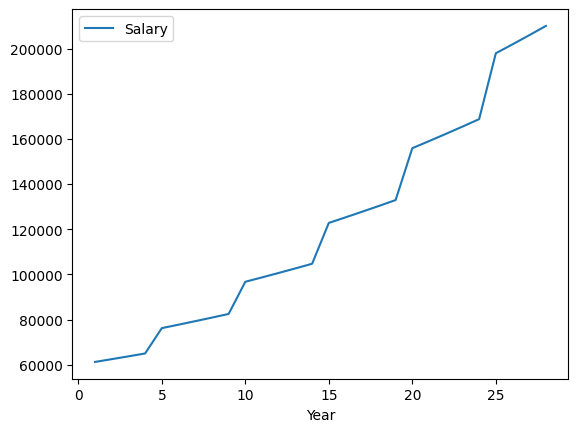

In [37]:
df.plot.line(x = 'Year', y = 'Salary')

<Axes: xlabel='Year'>

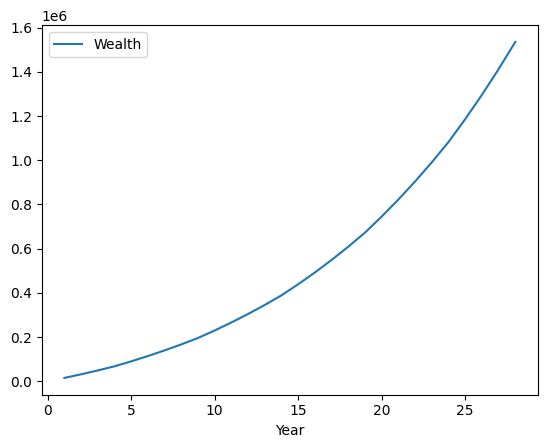

In [38]:
df.plot.line(x = 'Year', y = 'Wealth')